<a href="https://colab.research.google.com/github/kmkar31/Keras-inbuilt-Datasets/blob/master/Fashion_MNIST_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.datasets import fashion_mnist
import numpy as np

Using TensorFlow backend.


### Loading the MNIST Dataset

In [2]:
(Xtrain , ytrain) , (Xtest , ytest) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 0us/step


#### Reshaping and Normalizing training data

In [0]:
Xtrain = Xtrain.reshape(Xtrain.shape[0] , 28,28,1)
Xtest = Xtest.reshape(Xtest.shape[0] , 28,28,1)

In [0]:
Xtrain = Xtrain/255.0
Xtest = Xtest/255.0

### Split the training set into training and validation sets

In [0]:
Xvalidate = Xtrain[0:10000,:]
Xtrain = Xtrain[10000:60000,:]

yvalidate = ytrain[0:10000]
ytrain = ytrain[10000:60000]

#### One-hot encoding labels

In [0]:
ytrain = keras.utils.to_categorical(ytrain)
yvalidate = keras.utils.to_categorical(yvalidate)

### CNN Model

In [0]:
from keras.models import Sequential
from keras.layers import Dense , Conv2D , MaxPooling2D , Flatten , Dropout

In [8]:
model = Sequential()
input_shape = (28,28,1)

model.add(Conv2D(32 , kernel_size = (3,3) , strides = (1,1) , activation = 'relu' , kernel_initializer = 'he_uniform' , input_shape = input_shape))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size = (2,2) , strides = (2,2)))

model.add(Conv2D(32 , kernel_size = (3,3) , strides = (1,1) , activation = 'relu', kernel_initializer = 'he_uniform'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(100 , activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10 , activation = 'softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
dropout_2 (Dropout)          (None, 11, 11, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)              

### Compiling and Fitting the model

#### Optimizer = Adam
#### Loss Metric = categorical_crossentropy

In [0]:
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [10]:
history = model.fit(Xtrain ,ytrain,batch_size = 100 , epochs = 10 ,validation_data=(Xvalidate, yvalidate) , verbose = 1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 45s 904us/step - loss: 0.6860 - accuracy: 0.7611 - val_loss: 0.4420 - val_accuracy: 0.8514
Epoch 2/10
50000/50000 [==============================] - 45s 896us/step - loss: 0.4471 - accuracy: 0.8406 - val_loss: 0.3614 - val_accuracy: 0.8741
Epoch 3/10
50000/50000 [==============================] - 45s 891us/step - loss: 0.3985 - accuracy: 0.8583 - val_loss: 0.3407 - val_accuracy: 0.8847
Epoch 4/10
50000/50000 [==============================] - 45s 890us/step - loss: 0.3693 - accuracy: 0.8680 - val_loss: 0.3212 - val_accuracy: 0.8905
Epoch 5/10
50000/50000 [==============================] - 44s 887us/step - loss: 0.3504 - accuracy: 0.8736 - val_loss: 0.2981 - val_accuracy: 0.8915
Epoch 6/10
50000/50000 [==============================] - 44s 887us/step - loss: 0.3313 - accuracy: 0.8792 - val_loss: 0.2779 - val_accuracy: 0.9014
Epoch 7/10
50000/50000 [==============================] 

### Plotting the Accuracy and Losses for training and test sets

In [0]:
import matplotlib.pyplot as plt

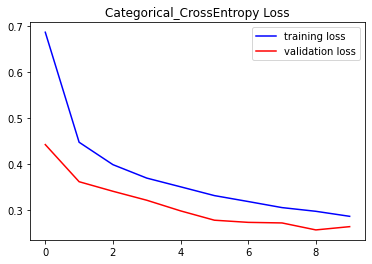

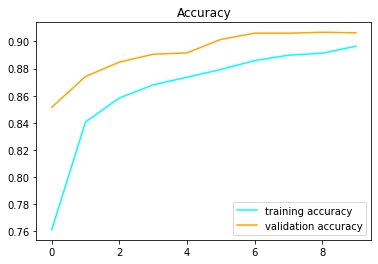

In [12]:
plt.title("Categorical_CrossEntropy Loss")
plt.plot(history.history['loss'] , color = 'blue' , label = 'training loss')
plt.plot(history.history['val_loss'] , color = 'red' , label = 'validation loss')
plt.legend()
plt.show()

plt.title("Accuracy")
plt.plot(history.history['accuracy'] , color = 'cyan' , label = 'training accuracy')
plt.plot(history.history['val_accuracy'] , color = 'orange' , label = 'validation accuracy')
plt.legend()
plt.show()

### Predicting test data

In [0]:
y_predict = np.argmax(model.predict(Xtest) , axis = 1)

In [14]:
y_predict

array([9, 2, 1, ..., 8, 1, 5])

In [15]:
accuracy = np.mean((y_predict==ytest))
print("Test accuracy = " , accuracy*100 , "%")

Test accuracy =  89.92999999999999 %


### User Input data

In [0]:
def user_input(path):
    img = keras.preprocessing.image.load_img(path, color_mode="grayscale" , target_size=(28,28) ,interpolation='nearest')
    X = keras.preprocessing.image.img_to_array(img, data_format=None, dtype=None)
    X = X.reshape(-1, 28,28,1)
    return X

In [0]:
import numpy as np
path = '<path_to_input>/input.jpg'
X = user_input(path)
yhat = model.predict(X)

predicted = np.argmax(yhat)

### Saving the model and weights

In [0]:
from keras.models import model_from_json

In [0]:
model_json = model.to_json()
with open("Fashion_MNIST_keras_model.json", "w") as json_file:
    json_file.write(model_json)

In [0]:
model.save_weights('Fashion_MNIST_keras_weights.h5')